# INFOSYS SPRINGBOARD - BREAST CANCER DETECTION USING ADABOOST CLASSIFIER PROJECT (WITHOUT OUTLIER)

Installing the necesssary libraries

In [1]:
!pip install numpy
!pip install pandas

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Reading the CSV file and naming columns

In [29]:
columns = ['ID', 'Diagnosis'] + ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("wdbc.data", header=None, names=columns)


Saving wdbc.data to wdbc (3).data


head() is for displaying the top 5 rows in the dataset

In [26]:
data.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


drop() for the noisy data

In [27]:
data=data.drop("ID",axis=1)

tail() is for displaying the bottom 5 rows in the dataset

In [28]:
data.tail()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


# Encoding

map() is used to replace the values of M & B with 1 & 0.

In [30]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

tail(3) is used to display the last 3 rows after mapping

In [31]:
data.tail(3)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


# HANDLING MISSING VALUES

shape is used to find the dimensions for the dataset

In [32]:
data.shape

(569, 32)

info() is used to find the summary of DataFrame

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    int64  
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

isnull().sum() is used to find the total number of null values in the dataset

In [34]:
data.isnull().sum()

,0
ID,0
Diagnosis,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0


describe() command in pandas is used to generate a summary of statistical information for numerical columns in a DataFrame and T is used transpose the results

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture1,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter1,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area1,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness1,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness1,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity1,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points1,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


unique values in each columns

In [36]:
unique_columns=data.nunique()
print(unique_columns)

ID                    569
Diagnosis               2
radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
dtype: int64


Duplicate Rows

In [37]:
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"Number of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


# DATA NORMALIZATION

In [38]:
from sklearn.preprocessing import StandardScaler

x=data.drop(columns=['Diagnosis'])  #splitting features and target
y=data['Diagnosis']
scaler=StandardScaler()  #mean and standard deviation of data
x_scaled=scaler.fit_transform(x)

x_scaled_df=pd.DataFrame(x_scaled,columns=x.columns)
print(x_scaled_df.head())

         ID   radius1  texture1  perimeter1     area1  smoothness1  \
0 -0.236405  1.097064 -2.073335    1.269934  0.984375     1.568466   
1 -0.236403  1.829821 -0.353632    1.685955  1.908708    -0.826962   
2  0.431741  1.579888  0.456187    1.566503  1.558884     0.942210   
3  0.432121 -0.768909  0.253732   -0.592687 -0.764464     3.283553   
4  0.432201  1.750297 -1.151816    1.776573  1.826229     0.280372   

   compactness1  concavity1  concave_points1  symmetry1  ...   radius3  \
0      3.283515    2.652874         2.532475   2.217515  ...  1.886690   
1     -0.487072   -0.023846         0.548144   0.001392  ...  1.805927   
2      1.052926    1.363478         2.037231   0.939685  ...  1.511870   
3      3.402909    1.915897         1.451707   2.867383  ... -0.281464   
4      0.539340    1.371011         1.428493  -0.009560  ...  1.298575   

   texture3  perimeter3     area3  smoothness3  compactness3  concavity3  \
0 -1.359293    2.303601  2.001237     1.307686      2.6166

# HANDLING OUTLIERS

In [40]:
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):  # Only apply to numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Identify outliers
            outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers = pd.concat([outliers, outliers_in_column], axis=0)
    return outliers.drop_duplicates()

outliers = detect_outliers_iqr(data)
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 223


In [41]:
outliers = outliers[outliers.index.isin(data.index)]
data=data.drop(outliers.index,axis=0)
print(data)

          ID  Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
6     844359          1    18.25     19.98      119.60  1040.0      0.09463   
10    845636          1    16.02     23.24      102.70   797.8      0.08206   
13    846381          1    15.85     23.95      103.70   782.7      0.08401   
16    848406          1    14.68     20.13       94.74   684.5      0.09867   
19   8510426          0    13.54     14.36       87.46   566.3      0.09779   
..       ...        ...      ...       ...         ...     ...          ...   
554   924632          0    12.88     28.92       82.50   514.3      0.08123   
555   924934          0    10.29     27.61       65.67   321.4      0.09030   
558   925277          0    14.59     22.68       96.39   657.1      0.08473   
560   925292          0    14.05     27.15       91.38   600.4      0.09929   
566   926954          1    16.60     28.08      108.30   858.1      0.08455   

     compactness1  concavity1  concave_points1  ...

# DATA VISUALIZATION

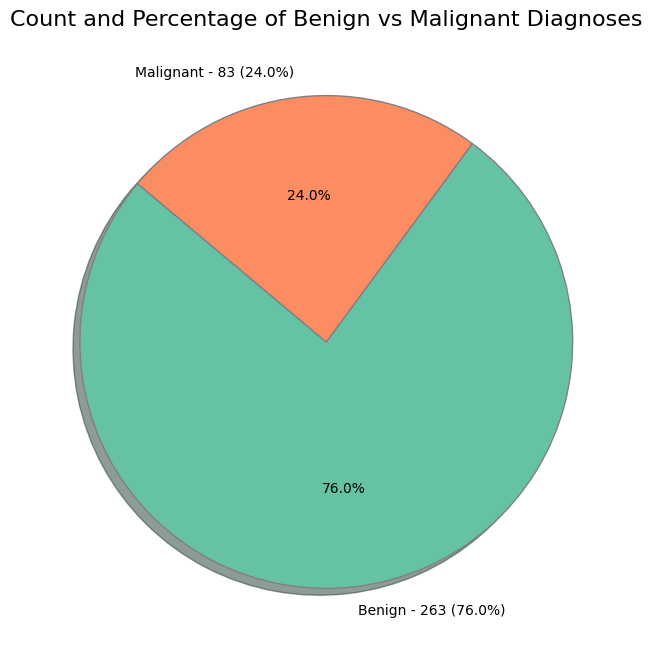

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map 1 to "Malignant" and 0 to "Benign"
data['Diagnosis'] = data['Diagnosis'].map({1: 'Malignant', 0: 'Benign'})

# Calculate counts and prepare labels with counts and percentages
counts = data['Diagnosis'].value_counts()
labels = [f'{label} - {count} ({count / sum(counts) * 100:.1f}%)' for label, count in zip(counts.index, counts)]

# Use a color palette for distinct colors
colors = sns.color_palette("Set2", len(counts))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',       # Show percentage on each slice
    startangle=140,          # Rotate for better readability
    colors=colors,           # Apply color palette
    wedgeprops={'edgecolor': 'gray'},  # Edge around slices
    shadow=True              # Add shadow for 3D effect
)

plt.title("Count and Percentage of Benign vs Malignant Diagnoses", fontsize=16)
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler

x=data.drop(columns=['Diagnosis'])  #splitting features and target
y=data['Diagnosis']
scaler=StandardScaler()  #mean and standard deviation of data
x_scaled=scaler.fit_transform(x)

x_scaled_df=pd.DataFrame(x_scaled,columns=x.columns)
print(x_scaled_df.head())

         ID   radius1  texture1  perimeter1     area1  smoothness1  \
0 -0.500752  1.956415  0.391738    1.967102  2.095166     0.125767   
1 -0.500367  1.064026  1.223373    0.968887  1.016340    -0.918065   
2 -0.500142  0.995996  1.404496    1.027953  0.949081    -0.756134   
3 -0.499530  0.527792  0.430003    0.498722  0.511670     0.461255   
4  1.814429  0.071593 -1.041940    0.068721 -0.014825     0.388179   

   compactness1  concavity1  concave_points1  symmetry1  ...   radius3  \
0      0.672519    1.094857         1.522340   0.305636  ...  2.426173   
1     -0.560280   -0.558764        -0.090192  -0.998285  ...  1.284102   
2      0.416111    0.818527         0.717063   0.565439  ...  0.556768   
3     -0.405561    0.290970         0.675534  -0.713971  ...  1.246962   
4     -0.134875    0.139321         0.486475   0.751714  ...  0.021325   

   texture3  perimeter3     area3  smoothness3  compactness3  concavity3  \
0  0.528876    2.474417  2.673599     0.781066      0.4511

# Splitting the data

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [45]:
print(f"Train data: {x_train.shape}")
print(f"Test data: {x_test.shape}")

Train data: (276, 31)
Test data: (70, 31)


# Implementing SMOTE

In [46]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
print(pd.Series(y_train_resampled).value_counts())

Diagnosis
Benign       204
Malignant    204
Name: count, dtype: int64


In [47]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

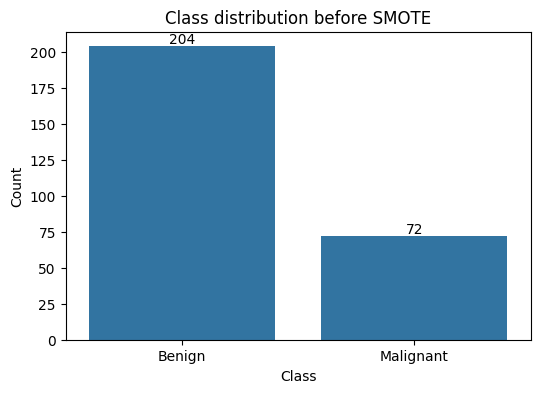

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Class distribution before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Benign", "Malignant"])  # Sets labels for x-axis ticks

# Adding count annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')

plt.show()

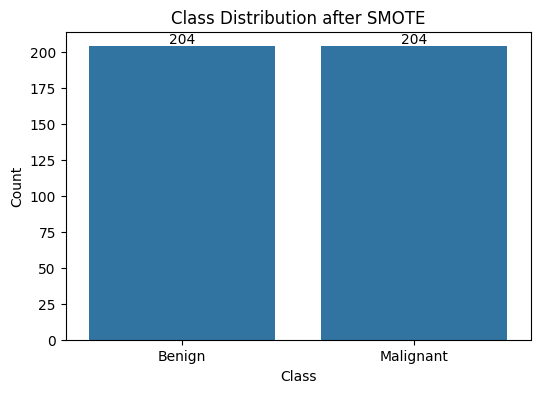

In [49]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution after SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Benign", "Malignant"])  # Sets labels for x-axis ticks

# Adding count annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')

plt.show()

# Implementing the ADABOOST classifer

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


base_classifier=DecisionTreeClassifier(max_depth=1)
ada_boost=AdaBoostClassifier(estimator=base_classifier,n_estimators=50,algorithm='SAMME',random_state=42)
ada_boost.fit(x_train_resampled,y_train_resampled)
y_pred=ada_boost.predict(x_test)

# Calculating the matrix

In [51]:
precision = precision_score(y_test, y_pred, pos_label='Malignant')
recall = recall_score(y_test, y_pred, pos_label='Malignant')
f1 = f1_score(y_test, y_pred, pos_label='Malignant')
accuracy = accuracy_score(y_test, y_pred)

In [52]:
y_pred = ada_boost.predict(x_test)

# Result

In [53]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9714285714285714
Precision: 0.9090909090909091
Recall: 0.9090909090909091
F1 Score: 0.9090909090909091


# Confusion Matrix

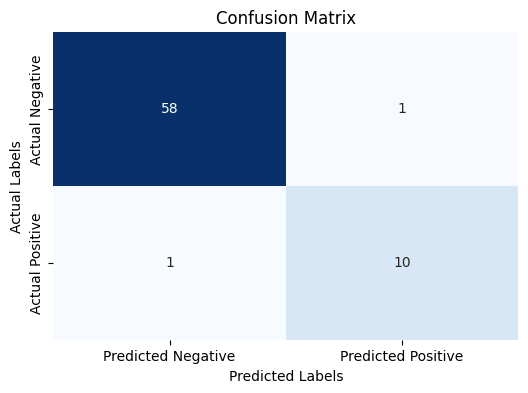

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report

In [55]:
from sklearn.metrics import classification_report

# Generate the classification report
report_smote = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report_smote)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.98      0.98      0.98        59
   Malignant       0.91      0.91      0.91        11

    accuracy                           0.97        70
   macro avg       0.95      0.95      0.95        70
weighted avg       0.97      0.97      0.97        70

